In [1]:
import os
import pandas as pd
path = r"C:\Users\KRASNIQ\Documents\These_1.1\resultats"

In [2]:
files = []
for i in os.listdir(path):
    if os.path.isfile(os.path.join(path,i)) and 'resultats_20_' in i:
        files.append(i)

In [3]:
files

['resultats_20_10.csv',
 'resultats_20_12.csv',
 'resultats_20_14.csv',
 'resultats_20_25.csv',
 'resultats_20_27.csv',
 'resultats_20_45.csv',
 'resultats_20_53.csv',
 'resultats_20_66.csv',
 'resultats_20_74.csv',
 'resultats_20_87.csv']

In [4]:
train_s1_20 = []
train_s1_30 = []
train_s1_40 = []
train_bagging = []
train_s2 = []

test_s1_20 = []
test_s1_30 = []
test_s1_40 = []
test_bagging = []
test_s2 = []

for i in files:
    data = pd.read_csv(i, sep=',')
    train_s1_20.append(data.iloc[0, 0])
    train_s1_30.append(data.iloc[1, 0])
    train_s1_40.append(data.iloc[2, 0])
    train_bagging.append(data.iloc[3, 0])
    train_s2.append(data.iloc[4, 0])

    test_s1_20.append(data.iloc[0, 1])
    test_s1_30.append(data.iloc[1, 1])
    test_s1_40.append(data.iloc[2, 1])
    test_bagging.append(data.iloc[3, 1])
    test_s2.append(data.iloc[4, 1])

In [5]:
print(r"NN_{bag}")

NN_{bag}


In [12]:
dt = train_bagging + train_s1_20+train_s1_30+train_s1_40+train_s2 + test_bagging +test_s1_20 +test_s1_30+ test_s1_40 + test_s2 
name = ["Bagging"]*10 + ["Bag_1_20"]*10 + ["Bag_1_30"]*10 + ["Bag_1_40"]*10 + ["Bag_2"]*10 +["Bagging"]*10 + ["Bag_1_20"]*10 + ["Bag_1_30"]*10 + ["Bag_1_40"]*10 + ["Bag_2"]*10
train = ["Train"]*50 + ["Test"]*50

In [13]:
datafra = pd.DataFrame()
datafra['poisson']=dt
datafra['Models'] = name
datafra['Train/Test'] = train

In [14]:
datafra

,poisson,Models,Train/Test
0,29.398445,Bagging,Train
1,29.335240,Bagging,Train
2,29.298742,Bagging,Train
3,29.321113,Bagging,Train
4,29.375429,Bagging,Train
...,...,...,...
95,29.426830,Bag_2,Test
96,29.383760,Bag_2,Test
97,29.402255,Bag_2,Test
98,29.406539,Bag_2,Test


import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

sns.boxplot(data=datafra, x='poisson', y='Models', hue="Train/Test", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.xlabel('Poisson Deviance', fontsize=15)
plt.ylabel('Methods', fontsize=15)
plt.title('Models = 20', fontsize=15)
plt.ytickslabels(["NN_{bag}", r"NN_{bag}", r"NN_{bag}", r"NN_{bag}", r"NN_{bag}", r"NN_{bag}"])
plt.yticks(fontsize=12)
#plt.xticks()
plt.yticks(fontsize=12)
plt.show();

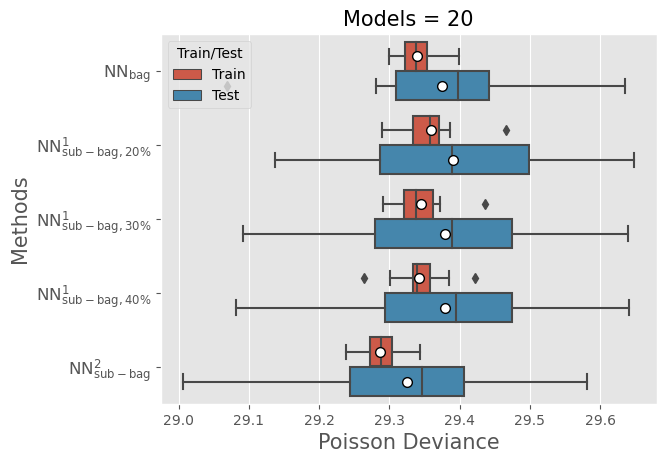

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

plt.style.use('ggplot')

cos = np.cos
pi  = np.pi

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)


fig = plt.figure()

ax  = fig.add_subplot(1, 1, 1)

#t   = np.linspace(0.0, 2*pi, 100)

#s   = cos(t)
#plt.plot(t, s)

sns.boxplot(data=datafra, x='poisson', y='Models', hue="Train/Test", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.xlabel('Poisson Deviance', fontsize=15)
plt.ylabel('Methods', fontsize=15)
plt.title('Models = 20', fontsize=15)


plt.yticks(fontsize=12)

plt.yticks(fontsize=12)

ax.set_yticks([0, 1,2,3, 4])

ax.set_yticklabels([r"NN$_{bag}$", r"NN$_{sub-bag, 20\%}^{1}$", r"NN$_{sub-bag, 30\%}^{1}$", 
                    r"NN$_{sub-bag, 40\%}^{1}$", r"NN$_{sub-bag}^{2}$"])


#ax.set_xticks([0, pi/2, pi, 3*pi/2, 2*pi])

#ax.set_xticklabels(['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

plt.show()

In [16]:
for j in  ["Bagging", "Bag_1_20", "Bag_1_30", "Bag_1_40", "Bag_2"]:
    for i in ['Train', 'Test']:
        print(j,i)
        print(datafra[(datafra['Train/Test'] == i) & (datafra['Models'] == j)]['poisson'].mean())
        print('\n')
        #print(datafra[(datafra['Train/Test'] == i) & (datafra['Models'] == j)]['poisson'].std())

Bagging Train
29.339459800000004


Bagging Test
29.375233700000003


Bag_1_20 Train
29.358619499999996


Bag_1_20 Test
29.389861399999994


Bag_1_30 Train
29.3443354


Bag_1_30 Test
29.379744800000005


Bag_1_40 Train
29.342537200000002


Bag_1_40 Test
29.3796288


Bag_2 Train
29.2864786


Bag_2 Test
29.3247684


